# 👊 CHAPTER 6 결정 트리


#### 🙋 Chapter Manager : 박선재  🙎 Contents Add :   설민욱                       

결정 트리 학습법(decision tree learning)은 어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델로써 결정 트리를 사용한다.
- 장점 :  
    - 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.  
    - 자료를 가공할 필요가 거의 없다. Data의 전처리(특히, feature의 scale을 맞추거나 평균을 원점에 맞추는 작업)가 거의 필요하지 않다
    - 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. 즉, 안정적이다.
    - 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.  
- 한계 :
    - 최적의 결정 트리를 학습하는 문제는 NP-완전 문제로 알려져 있고, 이는 최적화의 관점에서나 아니면 더 간단한 개념의 측면에서도 마찬가지이다. 결과적으로, 실질적인 결정 트리 학습 알고리즘은 각 노드에서의 부분 최적값을 찾아내는 탐욕 알고리즘 같은 휴리스틱 기법을 기반으로 하고 있다. 이런 알고리즘들은 최적 결정 트리를 알아낸다고 보장할 수는 없다.
    - 데이터의 특성이 특정 변수에 수직/수평적으로 구분되지 못할 때 분류율이 떨어지고, 트리가 복잡해지는 문제가 발생한다.  
    - 약간의 차이에 따라 (레코드의 개수의 약간의 차이) 트리의 모양이 많이 달라질 수 있다
    
    

In [1]:
from IPython.display import Image
Image(url="img/tree.png",height=300)

- `sample` : 각 노드로 분류된 데이터의 개수를 말한다.
- `value` : 각 노드에서 label(여기서는 `setosa, versicolor, virginica`)에 속하는 데이터의 개수를 말한다.
    - 예를 들어, 왼쪽 주황색 노드는 `setosa`가 50개, `versicolor, virginica`는 0개를 의미한다.

## 👊6.1 결정 트리 학습과 시각화

- 결정트리는 매우 직관적인 구조를 가지고 있어 시각화와 설명이 간단할 뿐만 아니라, 후에 앙상블 기법들과 함께 학습의 결과가 좋은 분류 모델이다.  
  
- 시각화 트리를 보면, 기준에 따라 구분하는 것을 파악할 수 있다. 맨 위의 기준을 root node 라 하며, 맨위에서 몇번이나 내려가냐에 따라 층 depth 라고 할 수 있으며, 중간에 있는 노드들을 internal node 즉 내부노드라고 한다. 분류된 기준에 따라, 나온 맨 밑의 네모들을 leaf node 라고 한다.  
 즉 가장 크게 분류하는 root node 부터 나무가 밑으로 뻗쳐나가듯 기준들을 바탕으로 분류하는 것으로 볼 수 있다.  
  
- 이때 어떤 기준을 노드로 놓아야 하며 어떤 노드를 가장 위에 놓아야 하는지가 문제가 된다. 노드들을 가장 효율적으로 선정하고 배치하기 위해서 부룬도라는 개념이 필요하다.

## 👊6.2 예측하기

지니 불순도는 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표이다. 어떤 집합에서 한 항목을 뽑아 무작위로 라벨을 추정할 때 틀릴 확률을 말한다. 집합에 있는 항목이 모두 같다면 지니 불순도는 최솟값(0)을 갖게 되며 이 집합은 완전히 순수하다고 할 수 있다.  
$G_i\ =\ 1\ -\ \sum_{k=1}^{n}{p_{i,k}}^2 $ 로 정의한다.
* $p_{i,k}$ 는 i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율  
  
예측 과정  

1. 맨위의 노드인 **루트 노드**(root node)에서 꽃잎의 길이(petal length)가 `2.45cm`보다 짧은지 비교한다.  
2. `2.45cm`보다 짧다면 왼쪽 노드(주황색)인 **자식 노드**(child node)로 이동한다.  
        - 이 경우에는 더 이상의 자식 노드가 없으므로 **리프 노드**(leaf node)가 된다.  
        - 그리고, 꽃의 종류를 `setosa`라고 예측한다.   
3. 반대로, `2.45cm` 보다 긴 경우 오른쪽 자식 노드로 가며, 꽃잎 너비가 `1.75cm` 보다 짧은지 비교하게 된다.    
4. 꽃잎의 너비가 `1.75cm` 보다 짧으면 왼쪽 리프 노드(초록색)로 가게되며, `versicolor`라고 예측하며, `1.75cm` 보다 길면, 오른쪽 리프 노드(보라색)으로 가게되며, `virginica`로 예측한다. 


## 👊6.3 클래스 확률 추정하기

결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있다. 
추정할 샘플이 속하는 leaf node에 있는 훈련 샘플의 비율로 확률을 추정한다.  
* $p_{k} = \frac{N_k}{\sum_{k=1}^{n}N_k} $ ,$N_k$는 노드의 훈련 샘플 중 클래스 k에 속한 샘플의 수


## 👊6.4 CART 훈련 알고리즘

결정 트리의 ’학습'은 학습에 사용되는 자료 집합을 적절한 분할 기준 또는 분할 테스트에 따라 부분 집합들로 나누는 과정이다. 이러한 과정은 순환 분할이라 불리는 방식으로 각각의 나눠진 자료 부분 집합에 재귀적으로 반복되며, 분할로 인해 더 이상 새로운 예측 값이 추가되지 않거나 부분 집합의 노드가 목표 변수와 같은 값을 지닐 때까지 계속된다.  
* sklearn은 Binary Tree만 만드는 CART Algorithm을 사용하므로 leaf node외의 모든 node는 자식 노드를 2개씩 가진다. 

 CART 훈련 Algorithm  
* 특징  
  - 탐욕적 Algorithm  
  - 맨 위 루트 노드에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복하며 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도를 이어질 수 있을지 없을지를 고려하지 않음.  
  - 종종 납득할만한 훌륭한 Solution을 만들지만 최적의 Solution을 보장하지는 않음  
  - 최적의 Tree를 찾는 것은 NP-Complete 문제로 $ O(exp(m)) $ 시간이 필요하기에 매우 작은 훈련 set에서도 적용하기 어려우므로 납득할만한 좋은 Solution으로만 만족해야함  
* process  
    1) 비용함수 $J(k,t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$ 최소화 할 수 있는 임계값으로 훈련 세트를 두 개의 서브셋으로 나눈다.  
    2) 성공적으로 나누어졌다면 이와 같은 방식으로 서브셋을 서브셋으로 반복적으로 나눈다.  
    - $ G_{left/right} $ 는 왼쪽/ 오른쪽 서브셋의 불순도  
    - $ m_{left/right} $ 는 왼쪽/ 오른쪽 서브셋의 샘플 수
    
 

## 👊6.5 계산 복잡도

- 일반적인 결정 트리는 대부분 좌/우 균형을 이루기 때문에 약 $O(\log_{2}{(m)})$ 개의 노드를 탐색해야 한다.
- 학습 단계에서는 각 노드마다 모든 데이터를 모든 특성($n$)에 비교하므로, 학습 단계에서의 복잡도는 $O(n \times m \log{(m)})$이다. 따라서, 학습 단계에서의 속도는 데이터의 크기가 클 수록 느리다.


## 👊6.6 지니 불순도 또는 엔트로피?

- 하나의 특성에서 두 개의 서브셋으로 나누는 기준은 **불순도(impurity)**를 **최소**(또는, 순도, homogeneity를 최대)로 하는 것이다.
- 기본값(default)으로 지니 계수(`Gini`)가 사용되지만, `criterion` 인자를 `"entropy"`로 설정하면, **엔트로피** 지표를 사용할 수 있다.


**엔트로피 계수**  
- $H_i = - \sum_{\underset{p_{i,k} \neq 0}{k=1}}^{n}{p_{i,k} \log_{2}{\left( p_{i, k} \right)}}$


지니(Gini)나 엔트로피(Entropy) 계수 둘 다 비슷한 트리를 만든다. 지니 계수가 계산이 조금 더 빠르기 때문에 Scikit-Learn에서는 지니 계수를 기본값을 사용한다. 

하지만, 지니 계수는 가장 빈도가 높은 클래스를 한쪽 가지(branch)로 고립시키는 경향이 있다고 한다.

## 👊6.7 규제 매개변수

의사결정나무 모델이 학습 데이터에 과적합 되는 것을 방지하기 위해 몇 가지 규제(regularization)가 있는데, 일반적으로 결정 트리의 **깊이(depth)**를 조절한다. Scikit-Learn에서는 `max_depth` 인자로 트리의 깊이를 설정할 수 있다. 

[`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)에서는 트리의 깊이(`max_depth`) 뿐만 아니라 규제를 하기위한 다른 인자들이 있다. 아래의 매개변수에서 `min_`으로 시작하는 매개변수를 증가 시키거나, `max_`로 시작하는 매개변수를 감소시키면 모델에 규제가 **커진다**.

- `min_samples_split` : 분할되기 위해 노드가 가져야 하는 최소 샘플(데이터) 수
- `min_samples_leaf` : 리프 노드가 가지고 있어야 하는 최소 샘플 수
- `min_weight_fraction_leaf` : `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- `max_leaf_nodes` : 리프 노드의 최대 개수
- `max_features` : 각 노드에서 분할에 사용할 특성의 최대 수  
  
\* 불필요한 노드를 가지치기(pruning) 하는 알고리즘이 있다. 대표적으로 $x^2$ 검정같은 통계적 검정을 통하여 불필요한 노드로 간주되면 그 노드는 삭제되고 불필요한 노드가 사라질 때까지 반복적으로 검증을 한다. 


## 👊6.8 회귀

결정 트리의 회귀분석은 분류와 비슷하다. CART 알고리즘은 학습 데이터셋을 불순도 대신 평균제곱오차(MSE)를 최소화하도록 트리를 분할한다.

$J\left(k, t_k \right) = \frac{m_{\text{left}}}{m} \text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m} \text{MSE}_{\text{right}}$


$\begin{cases} \text{MSE}_{\text{node}} = \sum_{i \in \text{node}}{\left( \hat{y}_\text{node} - y_i \right)^{2}} \\ \hat{y}_\text{node} = \frac{1}{m_\text{node}}\sum_{i \in \text{node}}{y_i} \end{cases}$

예측은 분류와 마찬가지로 리프 노드의 예측으로 평가한다. 리프 노드의 예측은 노드의 훈련 샘플 평균으로 계산한다.

## 👊6.9 불안정성

- 결정 트리 단점
    - 계단 모양의 결정 경계
    - 훈련 세트의 회전에 민감
    - 훈련 데이터에 있는 작은 변화에도 매우 민감
    - 최적점을 찾지 못하여 훈련 알고리즘이 확률적
- 해결 방안
    - PCA 기법을 사용하여 훈련데이터의 회전 민감도를 낮춘다
    - 7장의 앙상블 학습을 통하여 일반화한다

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

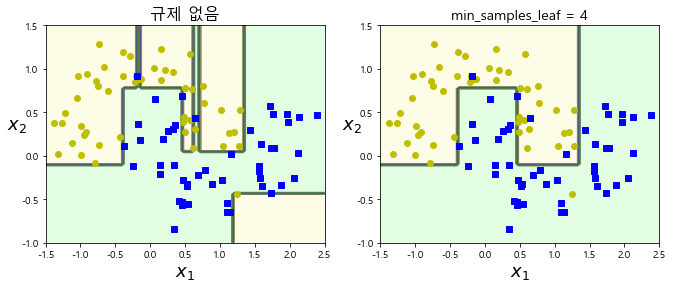

In [8]:
#Classifier, 
from sklearn.tree import DecisionTreeClassifier
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("규제 없음", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

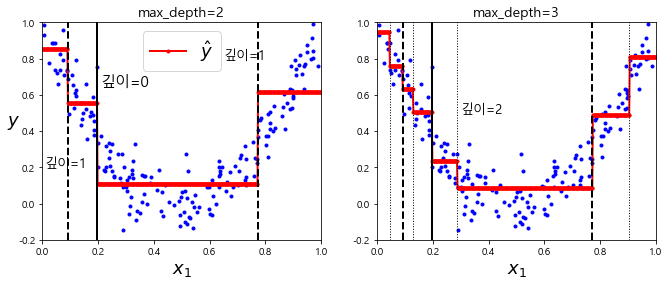

In [5]:
#Regressor
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "깊이=0", fontsize=15)
plt.text(0.01, 0.2, "깊이=1", fontsize=13)
plt.text(0.65, 0.8, "깊이=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "깊이=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()